In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb

import sklearn.model_selection as ms
import sklearn.preprocessing as sp
import sklearn.metrics as sm

from xgboost import XGBRegressor
from xgboost import plot_importance

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('../allstate-claims-severity/train.csv')
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [3]:
test = pd.read_csv('../allstate-claims-severity/test.csv')
test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [4]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [7]:
#  deal with missing values
train.isnull().sum().sum()

0

In [9]:
#  deal with duplicates
train[train.duplicated()]

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss


## Feature Engineering
### Continuous features & categorical features

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [17]:
cat_features = list(train.select_dtypes(include='object'))
# cat_features
print(f'categorical features: {cat_features}')

categorical features: ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat1

In [18]:
cont_features = list(train.select_dtypes(exclude='object'))
# cont_features
print(f'continuous features: {cont_features}')

continuous features: ['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss']


In [19]:
id_col = list(train.select_dtypes(include='int64'))
print(f'id_columns:{id_col}')

id_columns:['id']


In [28]:
# calculate the unique value in each categorical col
cat_dict = {}
for cat in cat_features:
    cat_dict[cat] = len(train[cat].value_counts())

In [31]:
df_cat = pd.DataFrame.from_dict(cat_dict, orient='index').reset_index()
df_cat.columns = ['cat_names', 'unique_values']
df_cat

,cat_names,unique_values
0,cat1,2
1,cat2,2
2,cat3,2
3,cat4,2
4,cat5,2
...,...,...
111,cat112,51
112,cat113,61
113,cat114,19
114,cat115,23


In [24]:
len(cat_features), len(cont_features)

(116, 16)

Text(7, 71, 'Binary features')

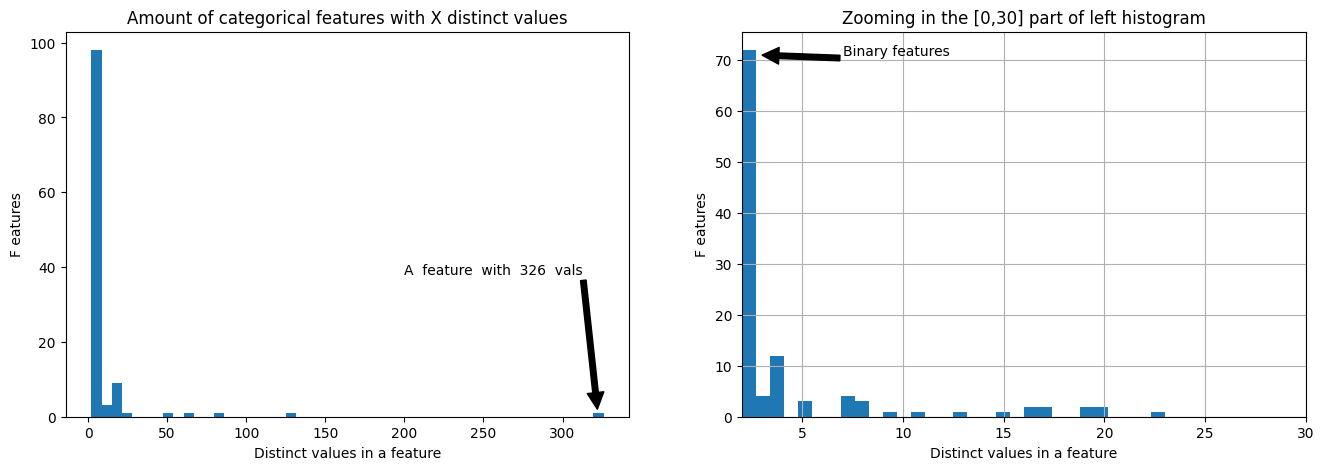

In [33]:
fig,(ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5)

ax1.hist(df_cat.unique_values, bins=50)
ax1.set_title('Amount of categorical features with X distinct values')
ax1.set_xlabel('Distinct values in a feature')
ax1.set_ylabel('Features')
ax1.annotate('A feature with 326 vals', xy=(322, 2), xytext=(200,  38),arrowprops=dict(facecolor='black'))

ax2.set_xlim(2,30)
ax2.set_title('Zooming in the [0,30] part of left histogram')
ax2.set_xlabel('Distinct values in a feature')
ax2.set_ylabel('Features')
ax2.grid(True)
ax2.hist(df_cat[df_cat['unique_values']<=30].unique_values, bins=30)
ax2.annotate('Binary features', xy=(3, 71), xytext=(7, 71), arrowprops=dict(facecolor='black'))


as we can see, most of categorical features are binary features, only few of them are multi-value features.

## TARGET LOSS

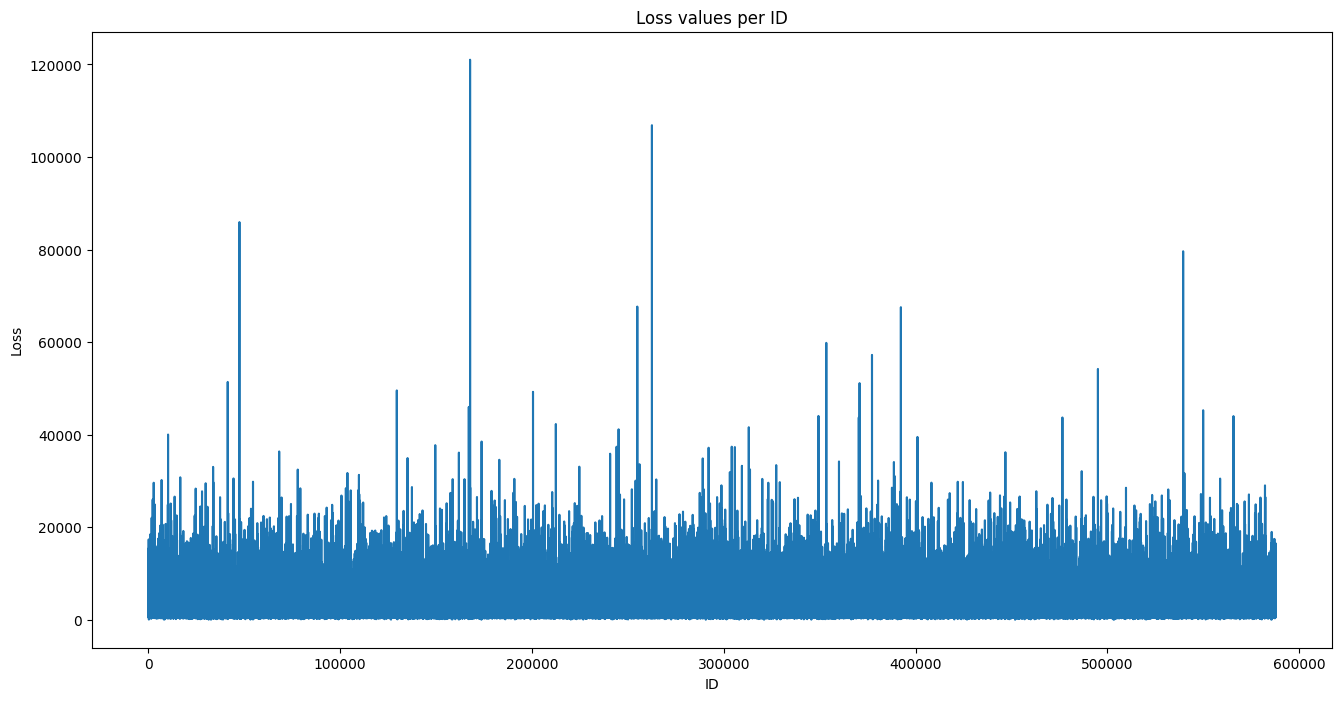

In [35]:
plt.figure(figsize=(16, 8))
plt.plot(train.id, train.loss)
plt.title('Loss values per ID')
plt.xlabel('ID')
plt.ylabel('Loss')
plt.show()

<Axes: >

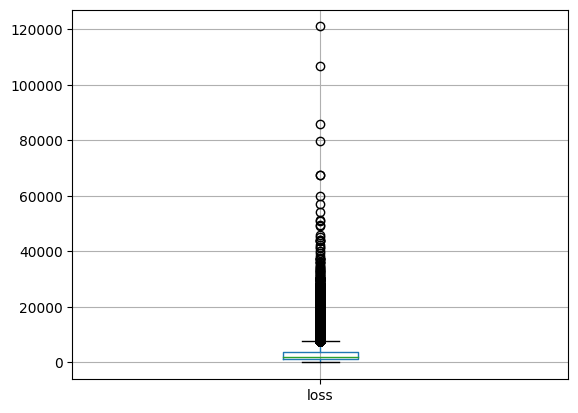

In [37]:
train.boxplot(column='loss')

In [39]:
# skewness and kurtosis
print(f'Skewness: {train.loss.skew():.3f}')
print(f'Kurtosis: {train.loss.kurt():.3f}')

Skewness: 3.795
Kurtosis: 48.080


In [40]:
# log transform the target:
train['log_loss'] = np.log(train.loss)

In [41]:
train['log_loss'].describe()

count    188318.000000
mean          7.685268
std           0.811868
min          -0.400478
25%           7.093787
50%           7.657080
75%           8.259470
max          11.703647
Name: log_loss, dtype: float64

In [ ]:
features = [x for x in train.columns if x not in ['id', 'loss', 'log_loss']]
features

In [45]:
X = train[features]
y = train['log_loss']

In [46]:
# encoder the categorical features with astype('category')
for cat in range(len(cat_features)):
    X[cat_features[cat]] = X[cat_features[cat]].astype('category').cat.codes

print(f'Xtrain:{X.shape}')
print(f'ytrain:{y.shape}')


Xtrain:(188318, 130)
ytrain:(188318,)


In [48]:
#  encoder the categorical features using LabelEncoder
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for cat in range(len(cat_features)):
#     X[cat_features[cat]] = le.fit_transform(X[cat_features[cat]])

## Simple XGBoost Model


In [55]:
dtrain = xgb.DMatrix(X, label=y)

In [57]:
xgb_params = {
    'objective':'reg:linear',
    'seed':0,
    'eta':0.1,
    'colsample_bytree':0.5,
    'subsample':0.5,
    'max_depth':6,
    'min_child_weight':3,
    'silent':1
}

In [63]:
def xgb_eval_mae(y_pred, dtrain):
    y = dtrain.get_label()
    return 'mae', mean_absolute_error(np.exp(y), np.exp(y_pred))


In [64]:
# cross validation
bst_cv1 = xgb.cv(xgb_params, dtrain, num_boost_round=50, nfold=5, seed=0,
                 feval=xgb_eval_mae, maximize=False, early_stopping_rounds=10)

[18:45:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:45:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[18:45:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:45:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[18:45:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objecti

In [65]:
print('CV score:', bst_cv1.iloc[-1, :]['test-mae-mean'])

CV score: 1204.4914551999998


<Axes: >

<Figure size 1600x800 with 0 Axes>

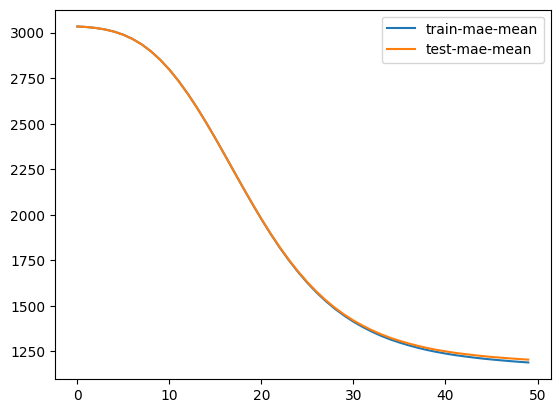

In [70]:
plt.figure(figsize=(16, 8))
bst_cv1[['train-mae-mean', 'test-mae-mean']].plot()

## XGBoost Hyperparameters 
    Step 1: inital parameters.
    Step 2: ajust max_depth and min_child_weight.
    Step 3: ajust gamma to reduce the risk of overfitting.
    Step 4: ajust subsample and colsample_bytree to change the data sampling strategy.
    Step 5: ajust eta.  
    
best parameters：  
XGBoostRegressor(num_boost_round=200, gamma=0.2, max_depth=8, min_child_weight=6, colsample_bytree=0.6, subsample=0.9, eta=0.07).

In [86]:
class XGBRegressor(object):
    def __init__(self, **kwargs):
        self.params = kwargs
        if 'num_boost_round' in self.params:
            self.num_boost_round = self.params['num_boost_round']
        self.params.update({'silent': 1, 'objective': 'reg:linear', 'seed': 0})

    def fit(self, X_train, y_train):
        dtrain = xgb.DMatrix(X_train, y_train)
        self.bst = xgb.train(params=self.params, dtrain=dtrain, num_boost_round=self.num_boost_round,
                            feval=xgb_eval_mae, maximize=False )
    
    def predict(self, X_test):
        X_test= xgb.DMatrix(X_test)
        self.bst = xgb.train(params=self.params, dtrain=dtrain,num_boost_round=self.num_boost_round,
                             feval=xgb_eval_mae, maximize=False)
        return self.bst.predict(X_test)
    
    def kflod(self, X_train, y_train, nflod=5):
        dtrain = xgb.DMatrix(X_train, y_train)
        cv_rounds = xgb.cv(params=self.params, dtrain=dtrain, num_boost_round=self.num_boost_round,
                           feval=xgb_eval_mae, maximize=False, early_stopping_rounds=10)        
        return cv_rounds.iloc[-1]
    
    def plot_features_importances(self):
        feature_importances = pd.Series(self.bst.get_score()).sort_values(ascending=False)
        feature_importances.plot(title='Feature Importances')
        plt.ylabel('Feature Importance Score')

    def get_params(self, deep=True):
        return self.params
    
    def set_params(self, **params):
        self.params.update(params)
        return self
    

        

In [87]:
bst = XGBRegressor(eta=0.1, colsample_bytree=0.5, subsample=0.5,
                   max_depth=5, min_child_weight=3, num_boost_round=50)

In [88]:
bst.kflod(X, y, nflod=5)

[23:59:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:59:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.

[23:59:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:59:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.

[23:59:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/

train-rmse-mean       0.559226
train-rmse-std        0.000204
test-rmse-mean        0.563389
test-rmse-std         0.000979
train-mae-mean     1210.553792
train-mae-std         1.863851
test-mae-mean      1220.110026
test-mae-std          6.763664
Name: 49, dtype: float64

## Preprocessing test data

In [74]:
test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [89]:
for cat in cat_features:
    test[cat] = test[cat].astype('category').cat.codes
    

In [90]:
test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,0,1,0,0,0,0,0,0,1,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,0,1,0,1,0,0,0,0,1,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,0,1,0,1,1,0,1,0,1,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,0,0,0,0,1,0,0,0,0,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,1,0,0,0,0,1,0,0,0,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [91]:
X_test = test[features]

In [92]:
X_test

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,1,0,0,0,0,0,0,1,0,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,0,1,0,1,0,0,0,0,1,0,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,0,1,0,1,1,0,1,0,1,1,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,0,0,0,0,1,0,0,0,0,0,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,1,0,0,0,0,1,0,0,0,0,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125541,0,0,0,1,0,0,0,0,0,0,...,0.281143,0.438917,0.815941,0.39455,0.48740,0.40666,0.550529,0.538473,0.298734,0.345946
125542,0,0,0,0,1,1,0,1,0,0,...,0.674529,0.346948,0.424968,0.47669,0.25753,0.26894,0.324486,0.352251,0.490001,0.290576
125543,1,1,0,0,1,0,0,0,1,1,...,0.794794,0.808958,0.511502,0.72299,0.94438,0.83510,0.933174,0.926619,0.848129,0.808125
125544,0,0,0,0,0,1,0,1,0,0,...,0.302678,0.372125,0.388545,0.31796,0.32128,0.36974,0.307628,0.301921,0.608259,0.361542


In [93]:
y_test = bst.predict(X_test)

[00:00:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[00:00:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.



In [99]:
y_pred = np.exp(y_test)
y_pred

array([1697.5968, 1720.9556, 7017.84  , ..., 2113.8672, 1001.4302,
       3698.2158], dtype=float32)

## Hyperparameter tuning

In [100]:
best_model = XGBRegressor(num_boost_round=200, gamma=0.2, max_depth=8, min_child_weight=6,
                          colsample_bytree=0.6, subsample=0.9, eta=0.07)

In [102]:
best_model.kflod(X, y, nflod=5)

[00:11:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[00:11:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.

[00:11:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[00:11:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.

[00:11:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/

train-rmse-mean       0.490928
train-rmse-std        0.000257
test-rmse-mean        0.538473
test-rmse-std         0.000810
train-mae-mean     1028.575928
train-mae-std         1.633464
test-mae-mean      1147.456665
test-mae-std          6.269516
Name: 199, dtype: float64

In [103]:
y_test = best_model.predict(X_test)

[00:20:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[00:20:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.



In [104]:
y_pred = np.exp(y_test)
test['loss'] = y_pred

In [105]:
test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,4,0,1,0,0,0,0,0,0,1,...,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562,1537.132812
1,6,0,1,0,1,0,0,0,0,1,...,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045,1728.076904
2,9,0,1,0,1,1,0,1,0,1,...,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232,8859.171875
3,12,0,0,0,0,1,0,0,0,0,...,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955,5400.181152
4,15,1,0,0,0,0,1,0,0,0,...,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823,828.854431


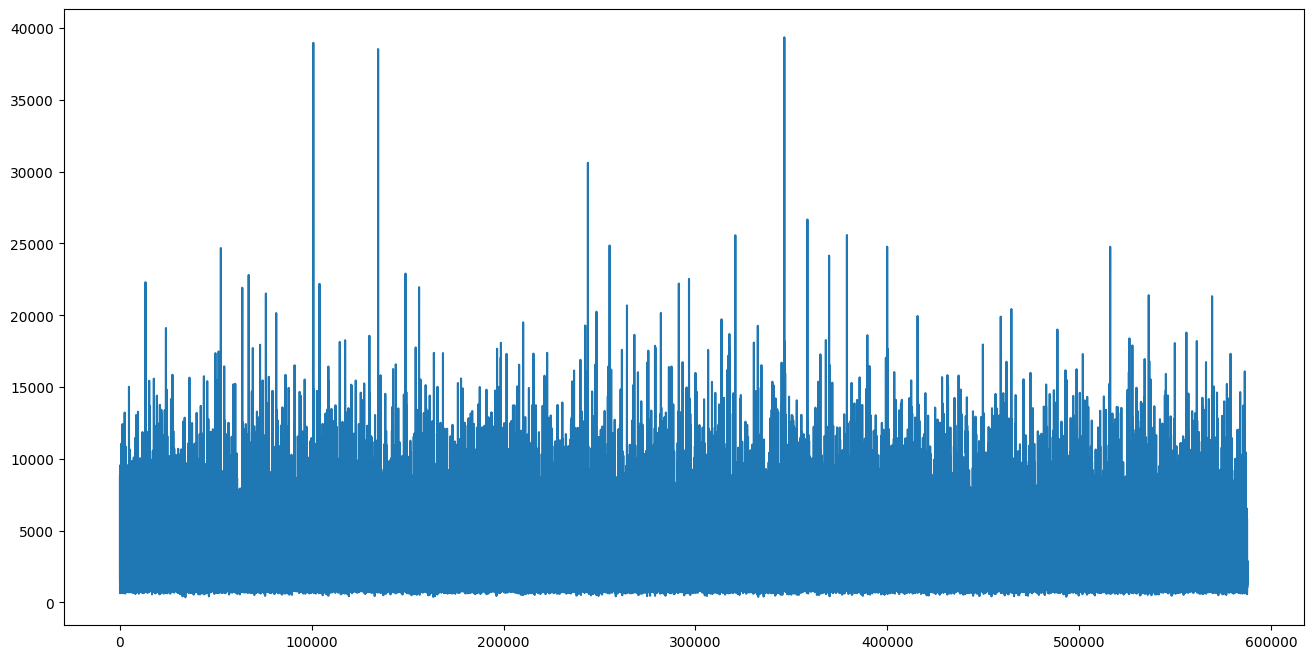

In [106]:
# plot the prediction
plt.figure(figsize=(16, 8))
plt.plot(test.id, y_pred)
plt.show()